# ✅ 1. Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

# Machine Learning & Metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve
from imblearn.over_sampling import SMOTE

# Settings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
%matplotlib inline

# ✅ 2. Load Dataset & Initial Analysis

In [2]:
dataset=pd.read_csv(r'D:\Projects\projects_uncomplet\HR_IBM Data\data\HR-Employee-Attrition.csv')

# ✅ 3 Professional Cleaning

In [3]:
def clean_hr_data(dataset):
    redundant_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
    dataset = dataset.drop(columns=[col for col in redundant_cols if col in dataset.columns])
    
    if dataset['Attrition'].dtype == 'O':
        dataset['Attrition'] = dataset['Attrition'].map({'Yes': 1, 'No': 0})
    
    return dataset

dataset = clean_hr_data(dataset)

#### show Shape

In [4]:
print(f"Dataset Shape after cleaning: {dataset.shape}")

Dataset Shape after cleaning: (1470, 41)


#### Head

In [5]:
display(dataset.head())

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,YearsSinceLastPromotion,YearsWithCurrManager,DailyRateGroups,HourlyRateGroups,MonthlyIncomeGroups,MonthlyRateGroups,TotalWorkingYearsGroups,YearsAtCompanyGroups,AgeGroups,YearsBeforeCompanyGroups
0,0,41,1,Travel_Rarely,1102,Sales,1,College,Life Sciences,2,...,0,5,K - 1100 => 1200,I - 90 => 100,E - 5000 => 6000,S - 19000 => 20000,D - 6 => 10 Years,D - 6 => 10 Years,E - 41 => 50 Years,B - 2 => 3 Years
1,1,49,0,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,3,...,1,7,B - 200 => 300,F - 60 => 70,E - 5000 => 6000,X - 24000 => 25000,D - 6 => 10 Years,D - 6 => 10 Years,E - 41 => 50 Years,B - 2 => 3 Years
2,2,37,1,Travel_Rarely,1373,Research & Development,2,College,Other,4,...,0,0,M - 1300 => 1400,I - 90 => 100,B - 2000 => 3000,B - 2000 => 3000,D - 6 => 10 Years,A - 0 => 1 Year,D - 31 => 40 Years,B - 2 => 3 Years
3,3,33,0,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,4,...,3,0,M - 1300 => 1400,E - 50 => 60,B - 2000 => 3000,W - 23000 => 24000,D - 6 => 10 Years,D - 6 => 10 Years,D - 31 => 40 Years,B - 2 => 3 Years
4,4,27,0,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,...,2,2,E - 500 => 600,C - 30 => 40,C - 3000 => 4000,P - 16000 => 17000,D - 6 => 10 Years,B - 2 => 3 Years,C - 26 => 30 Years,B - 2 => 3 Years


#### info

In [6]:
print(f"Dataset InFo: \n")
display(dataset.info())

Dataset InFo: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   int64 
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   object
 8   EducationField            1470 non-null   object
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   object
 14  JobRole 

None

#### Missing Values

In [7]:
print("\nMissing Values:")
print(dataset.isna().sum())


Missing Values:
Unnamed: 0                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsBeforeCompany          0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager   

### ✔ Confirms no missing values, simplifying preprocessing

# ✅4: Exploratory Data Analysis (Insight-Driven)

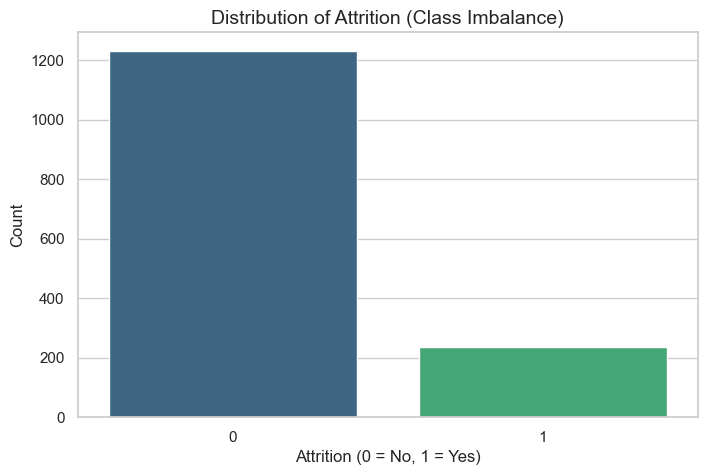

In [8]:
# Attrition Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Attrition', data=dataset, palette='viridis')
plt.title('Distribution of Attrition (Class Imbalance)', fontsize=14)
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## Insight: The chart shows that the data is imbalanced, as the majority of employees are continuing to work.


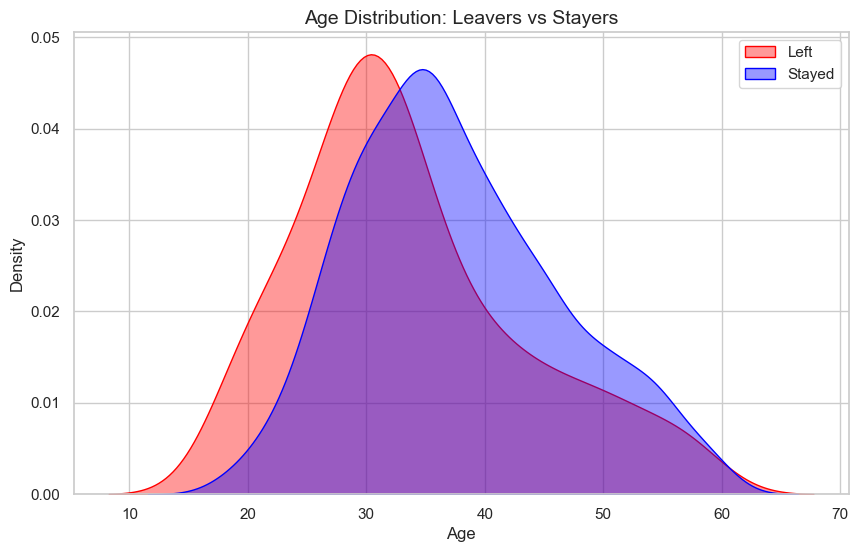

In [9]:
# Age Distribution: Leavers vs Stayers
plt.figure(figsize=(10, 6))
sns.kdeplot(dataset[dataset['Attrition'] == 1]['Age'], label='Left', fill=True, color='red', alpha=0.4)
sns.kdeplot(dataset[dataset['Attrition'] == 0]['Age'], label='Stayed', fill=True, color='blue', alpha=0.4)

plt.title('Age Distribution: Leavers vs Stayers', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

### Insight: We observe that younger employees (in their twenties) have a higher resignation rate compared to older age groups.

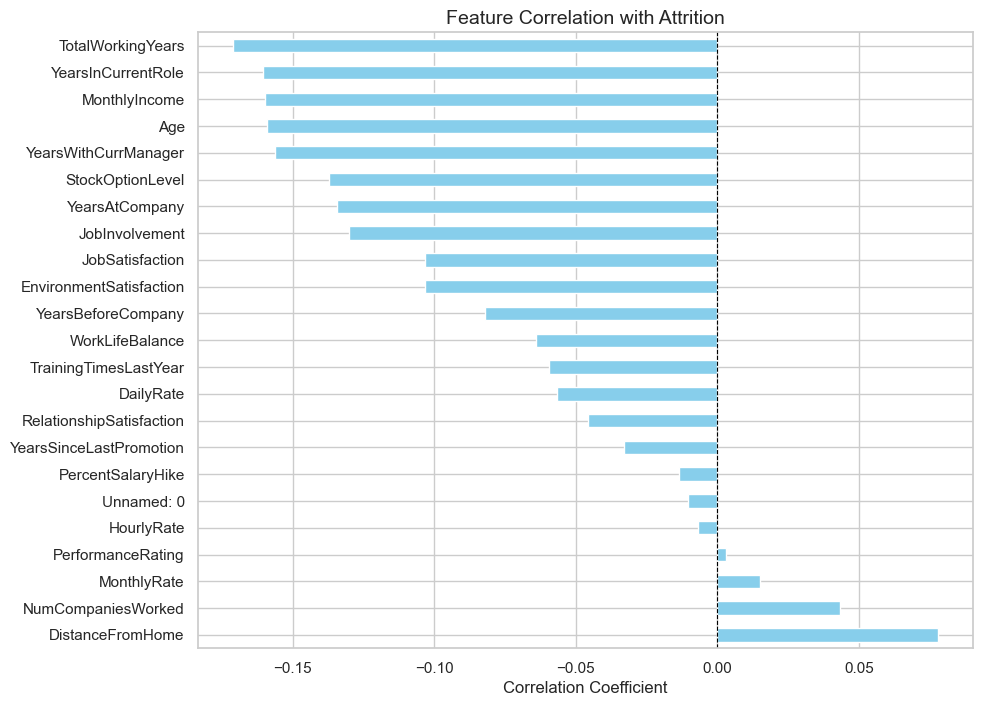

In [10]:
# Correlation with Target (Numerical Only)
plt.figure(figsize=(10, 8))

# Correlation calculation for numeric columns only
correlation_series =dataset.corr(numeric_only=True)['Attrition'].sort_values(ascending=False).drop('Attrition')

correlation_series.plot(kind='barh', color='skyblue')

plt.title('Feature Correlation with Attrition', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8) # إضافة خط الصفر للتمييز
plt.show()

#### Insight: Variables with positive values increase the likelihood of resignation, while negative values enhance job loyalty.

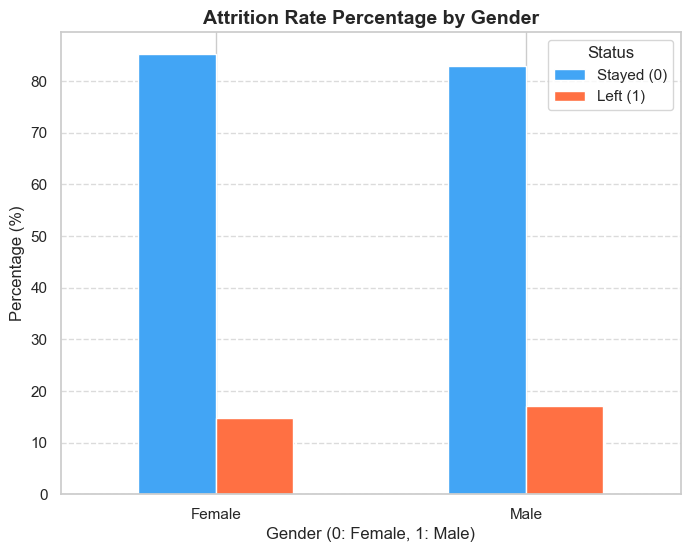

In [11]:
# Calculate percentages for visualization
gender_attrition = dataset.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack() * 100

# Plotting
plt.figure(figsize=(8, 6))
gender_attrition.plot(kind='bar', stacked=False, color=['#42a5f5', '#ff7043'], ax=plt.gca())

plt.title('Attrition Rate Percentage by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender (0: Female, 1: Male)', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(['Stayed (0)', 'Left (1)'], title='Status', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Analysis by gender reveals that male employees (Gender 1) have a slightly higher attrition rate (approx. 17%) compared to females (approx. 14.8%). However, the marginal difference suggests that gender is not a primary driver of turnover in this organization.

<Figure size 1400x600 with 0 Axes>

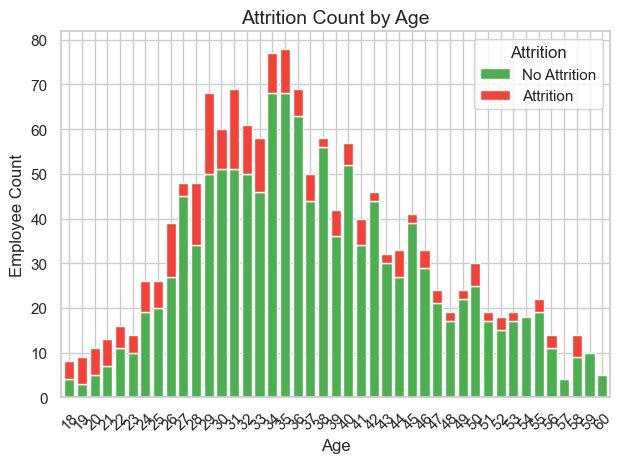

In [12]:
age_attrition = (
    dataset
    .groupby(['Age', 'Attrition'])
    .size()
    .unstack(fill_value=0)
)

# Plot
plt.figure(figsize=(14, 6))
age_attrition.plot(
    kind='bar',
    stacked=True,
    color=['#4CAF50', '#F44336'],
    width=0.8
)

plt.title('Attrition Count by Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Employee Count')
plt.legend(['No Attrition', 'Attrition'], title='Attrition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### The analysis indicates that retention strategies should prioritize employees in their 20s and early 30s, as this age group faces the greatest risk of attrition, whereas older employees show greater stability in the workforce

<Figure size 1400x600 with 0 Axes>

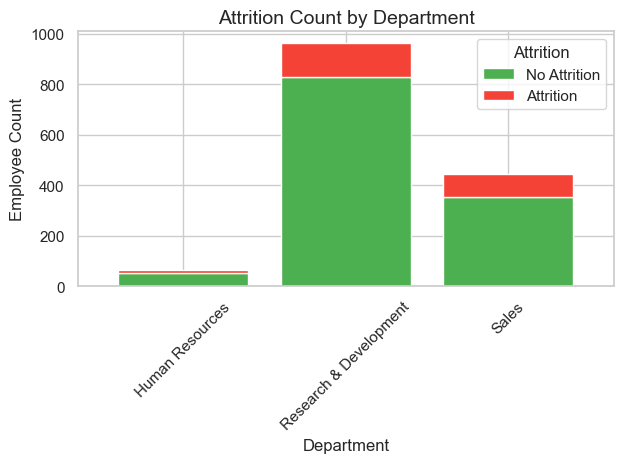

In [13]:
age_attrition = (
    dataset
    .groupby(['Department', 'Attrition'])
    .size()
    .unstack(fill_value=0)
)

# Plot
plt.figure(figsize=(14, 6))
age_attrition.plot(
    kind='bar',
    stacked=True,
    color=['#4CAF50', '#F44336'],
    width=0.8
)

plt.title('Attrition Count by Department', fontsize=14)
plt.xlabel('Department')
plt.ylabel('Employee Count')
plt.legend(['No Attrition', 'Attrition'], title='Attrition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Department 1 has the most employees and attrition cases, followed by Department 2, while Department 0 has the least

# ✅ 5. Identify Categorical & Numerical Columns

In [14]:
dataset.select_dtypes(include='object').columns

Index(['BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'OverTime', 'DailyRateGroups',
       'HourlyRateGroups', 'MonthlyIncomeGroups', 'MonthlyRateGroups',
       'TotalWorkingYearsGroups', 'YearsAtCompanyGroups', 'AgeGroups',
       'YearsBeforeCompanyGroups'],
      dtype='object')

In [15]:
dataset.select_dtypes(include='number').columns

Index(['Unnamed: 0', 'Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsBeforeCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# ✅ 6. Outlier Detection (Boxplots)


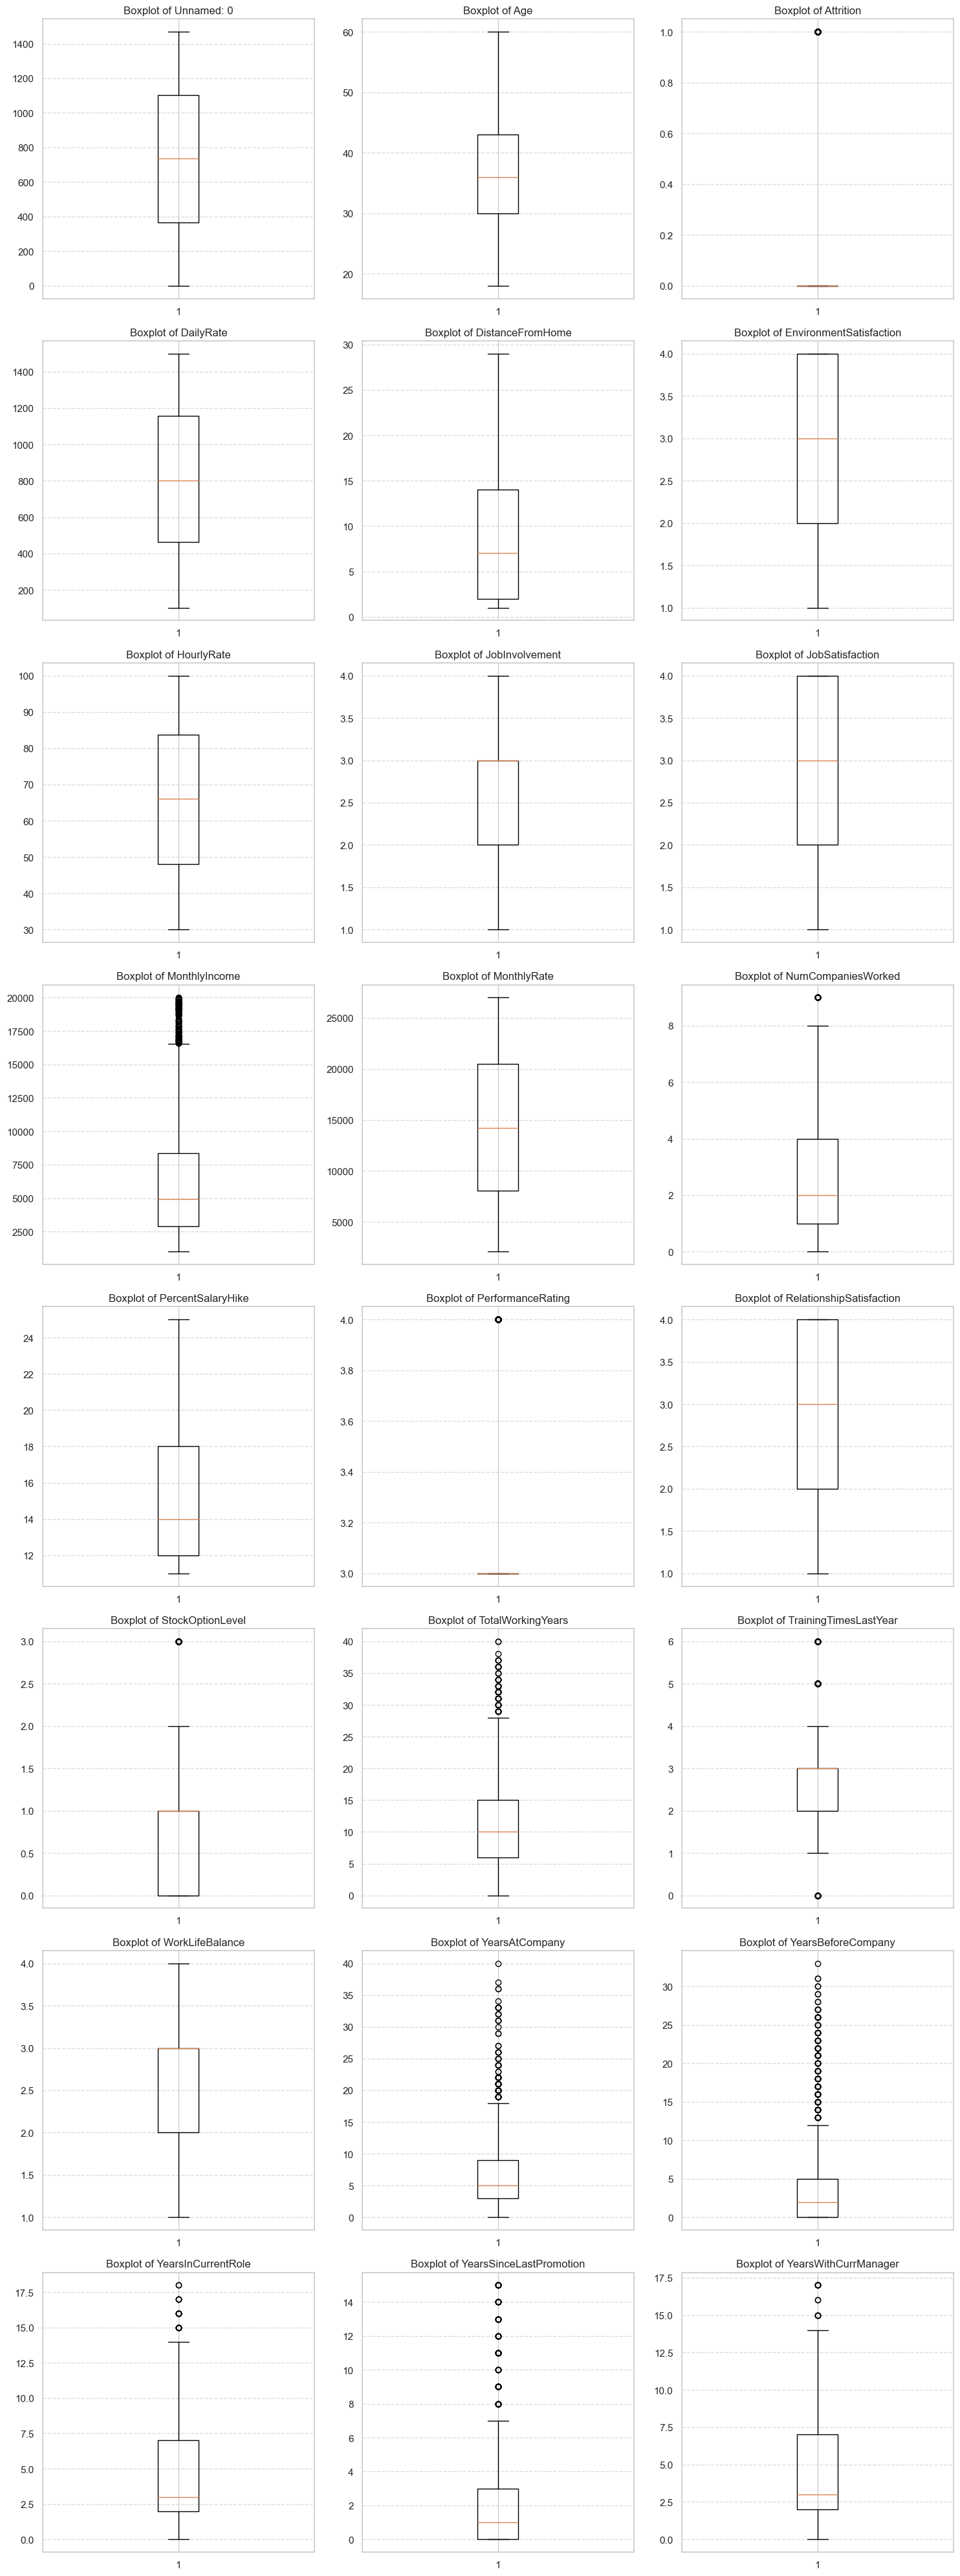

In [16]:
import matplotlib.pyplot as plt
import math

# Identify numerical columns
num_cols = dataset.select_dtypes(include='number').columns
n = len(num_cols)

# Define grid dimensions (e.g., 3 columns wide)
cols = 3
rows = math.ceil(n / cols)

# Create the figure
plt.figure(figsize=(15, rows * 5))

for i, col in enumerate(num_cols):
    plt.subplot(rows, cols, i + 1)
    plt.boxplot(dataset[col].dropna()) # Added .dropna() to prevent errors with missing values
    plt.title(f'Boxplot of {col}')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout() # Prevents titles from overlapping
plt.show()

# ✅ 7. Handle Outliers using IQR Clipping

In [17]:
for col in dataset.select_dtypes(include='number').columns:
    if col != 'Attrition':
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        dataset[col] = dataset[col].clip(lower=lower, upper=upper)

# ✅ 8. Encode Categorical Variables

In [18]:
labelmodel = LabelEncoder()

for col in dataset.select_dtypes(include='object'):
    dataset[col] = labelmodel.fit_transform(dataset[col])

# ✅ 9. Drop Unnecessary Column

In [19]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)

# ✅ 10. Feature–Target Split

In [20]:
X = dataset.drop('Attrition', axis=1)
y = dataset['Attrition']

# ✅ 11. Train-Test Split (Before SMOTE)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ 12. Handle Class Imbalance using SMOTE

In [22]:
# Apply SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())

Before SMOTE: {0: 986, 1: 190}
After SMOTE: {0: 986, 1: 986}


# ✅ 13 Visualization
#### Features Distribution

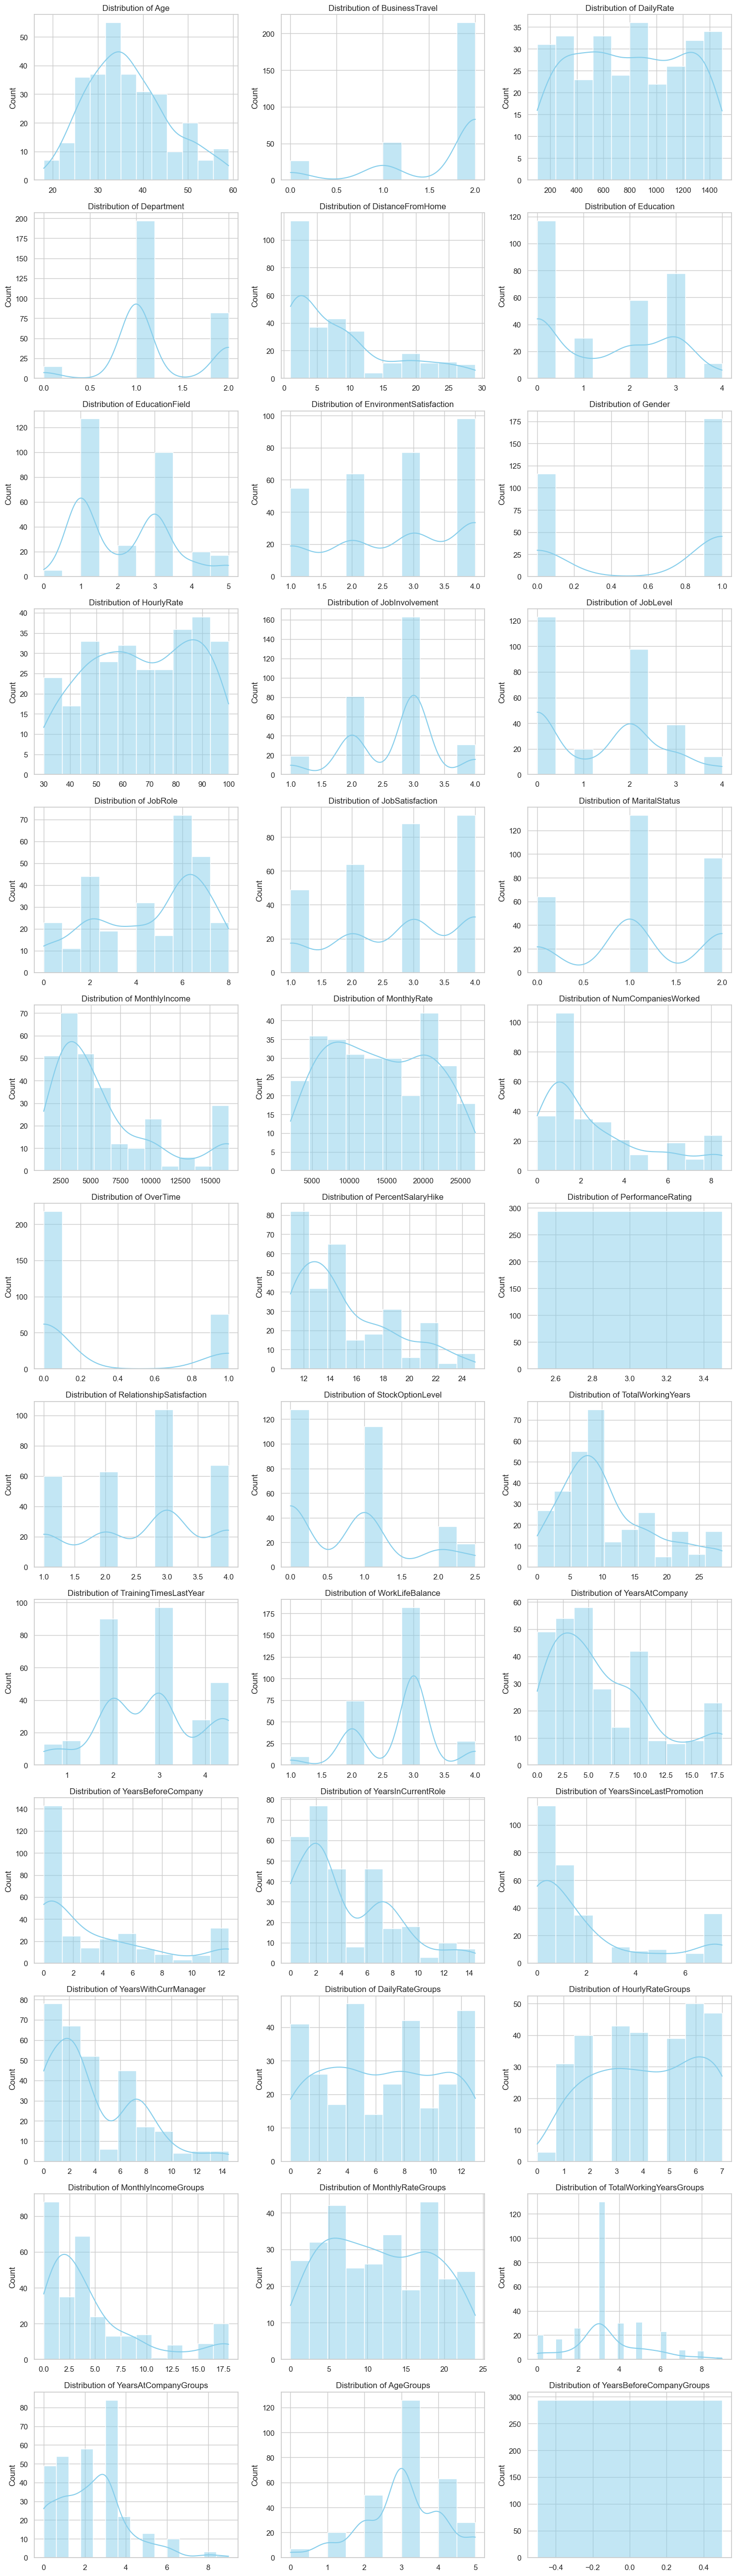

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Calculate the number of rows needed for the grid (assuming 3 columns)
num_features = len(X_test.columns)
cols = 3
rows = math.ceil(num_features / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() # Flatten to iterate easily

for i, col in enumerate(X_test.columns):
    sns.histplot(X_test[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')

# Remove any empty subplots if features don't fill the last row
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Correlation Heatmap (Visualization)

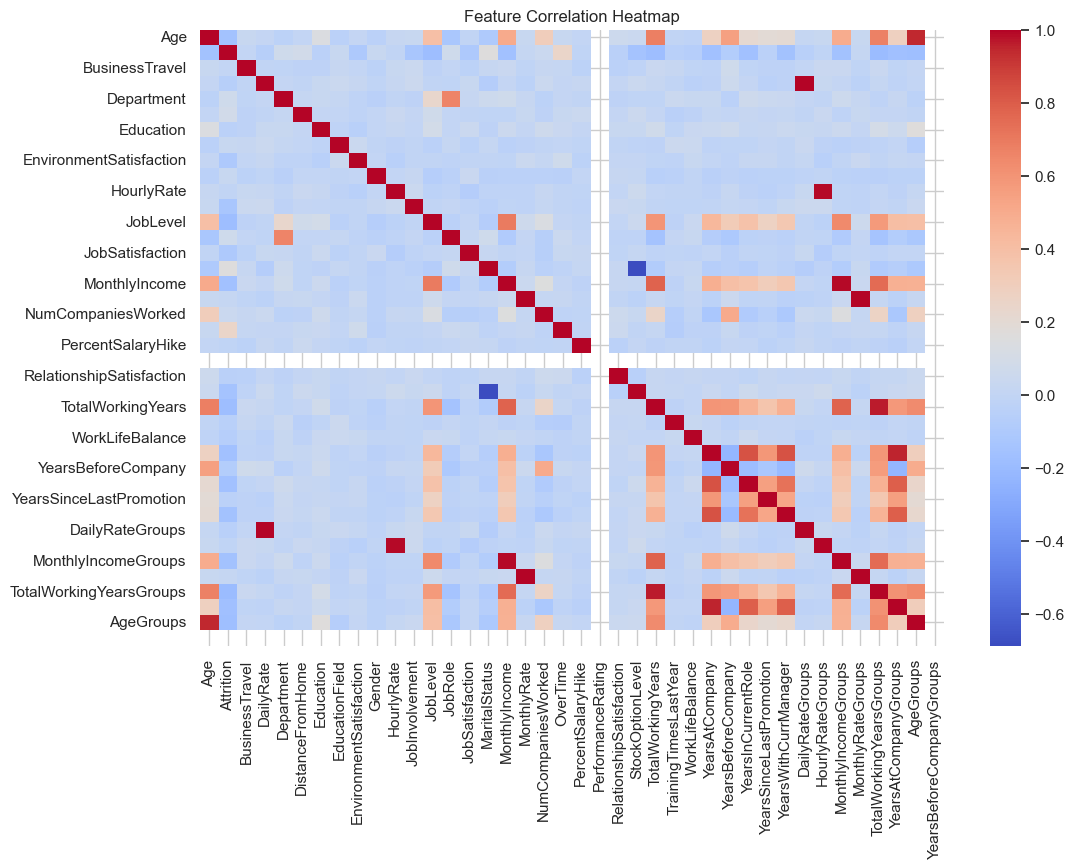

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# ✅ 14. Train Logistic Regression Model

In [25]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,33
,solver,'sag'
,max_iter,100
,multi_class,'deprecated'


# ✅ 15. Model Evaluation

In [26]:
# Accuracy scores
print('Train Accuracy:', LogisticRegressionModel.score(X_train, y_train))
print('Test Accuracy:', LogisticRegressionModel.score(X_test, y_test))

# Predictions
y_pred = LogisticRegressionModel.predict(X_test)

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Train Accuracy: 0.8384353741496599
Test Accuracy: 0.8401360544217688

Classification Report:

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294



# ✅ 16. Confusion Matrix Visualization

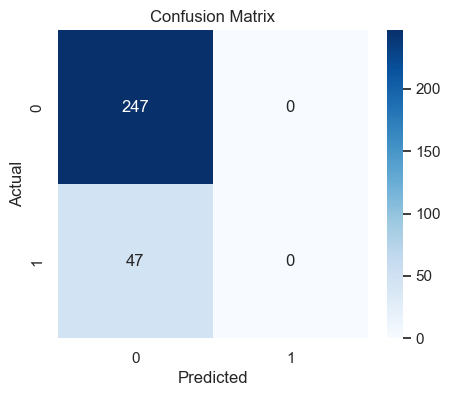

In [27]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ 17. ROC Curve & AUC

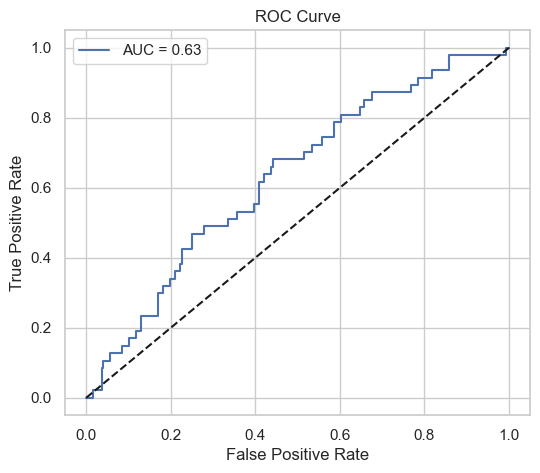

In [28]:
y_prob = LogisticRegressionModel.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()